Step 1 : Import all the required modules

In [1]:
import pandas as pd
import numpy as np
import scipy as stats
#visualization modules
import seaborn as sns
from matplotlib import pyplot as plt


import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True)

import warnings
warnings.filterwarnings('ignore')

Step 2 : Import and read the data

In [2]:
data_export = pd.read_csv('2010_2021_HS2_export.csv')
data_import = pd.read_csv('2010_2021_HS2_import.csv')

Step 3 : View the data

In [3]:
data_export.head()


,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,1.40,AFGHANISTAN,2010
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.08,AFGHANISTAN,2010
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,3.89,AFGHANISTAN,2010
3,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",NaN,AFGHANISTAN,2010
4,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,NaN,AFGHANISTAN,2010


In [4]:
data_import.head()

,HSCode,Commodity,value,country,year
0,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,9.14,AFGHANISTAN,2010
1,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,93.82,AFGHANISTAN,2010
2,9,"COFFEE, TEA, MATE AND SPICES.",2.54,AFGHANISTAN,2010
3,12,"OIL SEEDS AND OLEA. FRUITS; MISC. GRAINS, SEED...",0.32,AFGHANISTAN,2010
4,13,"LAC; GUMS, RESINS AND OTHER VEGETABLE SAPS AND...",37.67,AFGHANISTAN,2010


The HS code can be described as follows:

It is a six-digit identification code.
It has 5000 commodity groups.
Those groups have 99 chapters.
Those chapters have 21 sections.
It’s arranged in a legal and logical structure.
Well-defined rules support it to realize uniform classification worldwide

In [5]:
data_export.tail()

,HSCode,Commodity,value,country,year
184750,94,"FURNITURE; BEDDING, MATTRESSES, MATTRESS SUPPO...",0.19,ZIMBABWE,2021
184751,95,"TOYS, GAMES AND SPORTS REQUISITES; PARTS AND A...",0.03,ZIMBABWE,2021
184752,96,MISCELLANEOUS MANUFACTURED ARTICLES.,0.31,ZIMBABWE,2021
184753,98,PROJECT GOODS; SOME SPECIAL USES.,0.01,ZIMBABWE,2021
184754,99,MISCELLANEOUS GOODS.,0.00,ZIMBABWE,2021


In [6]:
data_import.tail()

,HSCode,Commodity,value,country,year
101046,84,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",0.02,ZIMBABWE,2021
101047,85,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,0.00,ZIMBABWE,2021
101048,90,"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURIN...",0.03,ZIMBABWE,2021
101049,97,WORKS OF ART COLLECTORS' PIECES AND ANTIQUES.,0.00,ZIMBABWE,2021
101050,99,MISCELLANEOUS GOODS.,NaN,ZIMBABWE,2021


In [7]:
data_export.describe()

,HSCode,value,year
count,184755.000000,165497.000000,184755.000000
mean,51.232291,22.233844,2015.590344
std,27.965879,223.795216,3.444532
min,1.000000,0.000000,2010.000000
25%,28.000000,0.030000,2013.000000
50%,52.000000,0.370000,2016.000000
75%,74.000000,3.870000,2019.000000
max,99.000000,19805.170000,2021.000000


In [8]:
data_import.describe()

,HSCode,value,year
count,101051.000000,85306.000000,101051.000000
mean,53.655501,64.183018,2015.541143
std,27.627867,680.976703,3.464244
min,1.000000,0.000000,2010.000000
25%,30.000000,0.030000,2012.000000
50%,54.000000,0.380000,2016.000000
75%,78.000000,5.040000,2019.000000
max,99.000000,32781.570000,2021.000000


In [9]:
data_export.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184755 entries, 0 to 184754
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   HSCode     184755 non-null  int64  
 1   Commodity  184755 non-null  object 
 2   value      165497 non-null  float64
 3   country    184755 non-null  object 
 4   year       184755 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 7.0+ MB


In [10]:
data_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101051 entries, 0 to 101050
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   HSCode     101051 non-null  int64  
 1   Commodity  101051 non-null  object 
 2   value      85306 non-null   float64
 3   country    101051 non-null  object 
 4   year       101051 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 3.9+ MB


Step 4 : Finding missing and unique values

In [11]:
data_export.isnull().sum()

HSCode           0
Commodity        0
value        19258
country          0
year             0
dtype: int64

In [12]:
data_import.isnull().sum()

HSCode           0
Commodity        0
value        15745
country          0
year             0
dtype: int64

In [13]:
data_export.nunique()

HSCode          98
Commodity       98
value        12944
country        249
year            12
dtype: int64

In [14]:
data_import.nunique()

HSCode          98
Commodity       98
value        11062
country        243
year            12
dtype: int64

Step 5 : Data Processing

In [15]:
data_e = data_export.dropna(subset=['value'])
print(data_e["value"].isna().sum())

0


In [16]:
data_i = data_import.dropna(subset=['value'])
print(data_i["value"].isna().sum())

0


In [17]:
data_e['country'].value_counts()[:10]

U ARAB EMTS      1176
NEPAL            1170
U S A            1166
MALAYSIA         1162
U K              1160
GERMANY          1159
SINGAPORE        1155
BANGLADESH PR    1155
SRI LANKA DSR    1154
SOUTH AFRICA     1152
Name: country, dtype: int64

In [18]:
data_i['country'].value_counts()[:10]

U S A          1169
ITALY          1157
GERMANY        1153
CHINA P RP     1151
U K            1150
FRANCE         1142
SPAIN          1122
SINGAPORE      1119
THAILAND       1119
U ARAB EMTS    1112
Name: country, dtype: int64

In [19]:
print(len(data_e['country'].unique()))

249


In [20]:
print(len(data_i['country'].unique()))

242


Step 6 : Exploratory Data Analysis

6.1 : Year wise analysis

In [21]:
exp_year = data_e.groupby('year').agg({'value':'sum'})
imp_year = data_i.groupby('year').agg({'value':'sum'})

In [22]:
print(exp_year)

          value
year           
2010  249801.18
2011  305948.28
2012  300384.32
2013  314388.61
2014  310321.02
2015  262274.30
2016  275835.27
2017  303507.85
2018  330058.64
2019  313341.14
2020  291789.46
2021  421984.37


In [23]:
exp_year['Growth Rate(E)'] = exp_year.pct_change()
print(exp_year['Growth Rate(E)'])

year
2010         NaN
2011    0.224767
2012   -0.018186
2013    0.046621
2014   -0.012938
2015   -0.154829
2016    0.051705
2017    0.100323
2018    0.087480
2019   -0.050650
2020   -0.068780
2021    0.446195
Name: Growth Rate(E), dtype: float64


In [24]:
imp_year['Growth Rate(I)'] = imp_year.pct_change()

In [25]:
exp_year = exp_year.rename(columns={'value': 'Export'})
imp_year = imp_year.rename(columns={'value': 'Import'})
total_year = pd.concat([exp_year, imp_year], axis = 1)
total_year['Trade Deficit'] = exp_year.Export - imp_year.Import
print(total_year)

         Export  Growth Rate(E)     Import  Growth Rate(I)  Trade Deficit
year                                                                     
2010  249801.18             NaN  369762.25             NaN     -119961.07
2011  305948.28        0.224767  489311.81        0.323315     -183363.53
2012  300384.32       -0.018186  490730.07        0.002898     -190345.75
2013  314388.61        0.046621  450192.99       -0.082606     -135804.38
2014  310321.02       -0.012938  448026.63       -0.004812     -137705.61
2015  262274.30       -0.154829  381000.97       -0.149602     -118726.67
2016  275835.27        0.051705  384350.29        0.008791     -108515.02
2017  303507.85        0.100323  465574.02        0.211327     -162066.17
2018  330058.64        0.087480  514071.33        0.104167     -184012.69
2019  313341.14       -0.050650  474701.75       -0.076584     -161360.61
2020  291789.46       -0.068780  394428.98       -0.169101     -102639.52
2021  421984.37        0.446195  61304

In [26]:
print('Descriptive statistics')
display(total_year.describe())

Descriptive statistics


,Export,Growth Rate(E),Import,Growth Rate(I),Trade Deficit
count,12.000000,11.000000,12.000000,11.000000,12.000000
mean,306636.203333,0.059246,456266.375000,0.065641,-149630.171667
std,43052.939353,0.162889,69331.700692,0.219915,33102.919639
min,249801.180000,-0.154829,369762.250000,-0.169101,-191061.040000
25%,287800.912500,-0.034418,391909.307500,-0.079595,-183525.820000
50%,304728.065000,0.046621,457883.505000,0.002898,-149533.110000
75%,313603.007500,0.093901,489666.375000,0.157747,-119652.470000
max,421984.370000,0.446195,613045.410000,0.554261,-102639.520000


data_e.sum(['value])

From this we can conclude that :
1. The export growth rate from the year 2010 to 2021 has been 59.2 %
2. The import growth rate from the year 2010 to 2021 has been 6.5 %
3. Both imports and exports saw a big dip in the year 2015 and eventually again in 2020 due to Covid 19.
4. Both imports and exports have been the highest in the year 2021.

6.2 : Visualization of year analysis data

In [27]:
#histogram of year-wise exports and imports in usd

bar1 = go.Bar(
    x = total_year.index,
    y = total_year.Export,
    name = "Export",
                marker = dict(color = 'rgb(204, 0, 102)',
                             line=dict(color='rgb(0,0,0)',width=1.0)),
                text = total_year.Export
)
bar2 = go.Bar(
    x = total_year.index,
    y = total_year.Import,
    name = "Import",
                marker = dict(color = 'rgb(102, 0, 51)',
                             line=dict(color='rgb(0,0,0)',width=1.0)),
                text = total_year.Import
)
layout = go.Layout(hovermode= 'closest', title = 'Export/Import of Indian Trade from 2010 to 2021' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'USD (millions)'))
fig = go.Figure(data=[bar1,bar2],layout = layout)
fig.show()

In [28]:
#growth rate scatter plot for exports and imports

scatter1 = go.Scatter(
    x = total_year.index,
    y = total_year["Growth Rate(E)"],
    name = "Export",
    line_color='blue',
                opacity=0.8,
                text = total_year['Growth Rate(E)']
                

)
scatter2 = go.Scatter(
    
    x = total_year.index,
    y = total_year["Growth Rate(I)"],
    name = "Import",
               line_color='turquoise',
                opacity=0.8,
                text = total_year['Growth Rate(E)']
)
layout = go.Layout(hovermode= 'closest', title = 'Export/Import Growth Rate from 2010 to 2021' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Growth Rate'))
fig = go.Figure(data=[scatter1,scatter2],layout = layout)
fig.show()

In [29]:
#exports and imports with their trade deficits of that year histogram

bar1 = go.Bar(
    x = total_year.index,
    y = total_year.Import,
    name = "Import",
                marker = dict(color = 'rgb(0, 204, 0)',
                             line=dict(color='rgb(0,0,0)',width=1.0)),
                text = total_year.Import
)

bar2 = go.Bar(
    x = total_year.index,
    y = total_year.Export,
    name = "Export",
                marker = dict(color = 'rgb(76, 153, 0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = total_year.Export
)

bar3 = go.Bar(
    x = total_year.index,
    y = total_year['Trade Deficit'],
    name = "Trade Deficit",
                marker = dict(color = 'rgb(0, 102, 51)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = total_year['Trade Deficit']
)

layout = go.Layout(hovermode= 'closest', title = 'Export/Import of Indian Trade Deficits from 2010 to 2021' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'USD (in millions)'))
fig = go.Figure(data=[bar1,bar2,bar3],layout = layout)
fig.show()

6.3 : Commodity wise Analysis

In [30]:
print("Total Commodities for Exports ", data_e['Commodity'].nunique())
print("Total Commodities for Imports ", data_i['Commodity'].nunique())

Total Commodities for Exports  98
Total Commodities for Imports  98


In [31]:
#Top 5 import and export commodity

print("Top 5 Imports Commodity : \n", pd.DataFrame(data_i['Commodity'].value_counts().head(5)))
print('\n')
print("Top 5 Exports Commodity : \n", pd.DataFrame(data_e['Commodity'].value_counts().head(5)))

Top 5 Imports Commodity : 
                                                     Commodity
ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS TH...       2081
NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHAN...       1970
IRON AND STEEL                                           1828
ALUMINIUM AND ARTICLES THEREOF.                          1716
PLASTIC AND ARTICLES THEREOF.                            1712


Top 5 Exports Commodity : 
                                                     Commodity
NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHAN...       2537
ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS TH...       2514
PHARMACEUTICAL PRODUCTS                                  2513
OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING...       2488
PLASTIC AND ARTICLES THEREOF.                            2435


In [32]:
exp_comm = data_e.groupby('Commodity').agg({'value':'sum'})
exp_comm = exp_comm.sort_values(by = 'value', ascending = False)
exp_comm = exp_comm[:10]

imp_comm = data_i.groupby('Commodity').agg({'value':'sum'})
imp_comm = imp_comm.sort_values(by = 'value', ascending = False)
imp_comm = imp_comm[:10]

In [33]:
print(exp_comm)
print(imp_comm)

                                                        value
Commodity                                                    
MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THE...  573781.24
NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPREC...  484859.90
NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHAN...  189003.07
VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING ...  174616.34
ORGANIC CHEMICALS                                   170491.42
PHARMACEUTICAL PRODUCTS                             156859.86
ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS TH...  139396.39
IRON AND STEEL                                      120904.29
CEREALS.                                             97642.07
ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, N...   96902.61
                                                         value
Commodity                                                     
MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THE...  1756299.54
NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPREC...   813961.33
ELEC

6.4 : Visualization of commodity analysis data

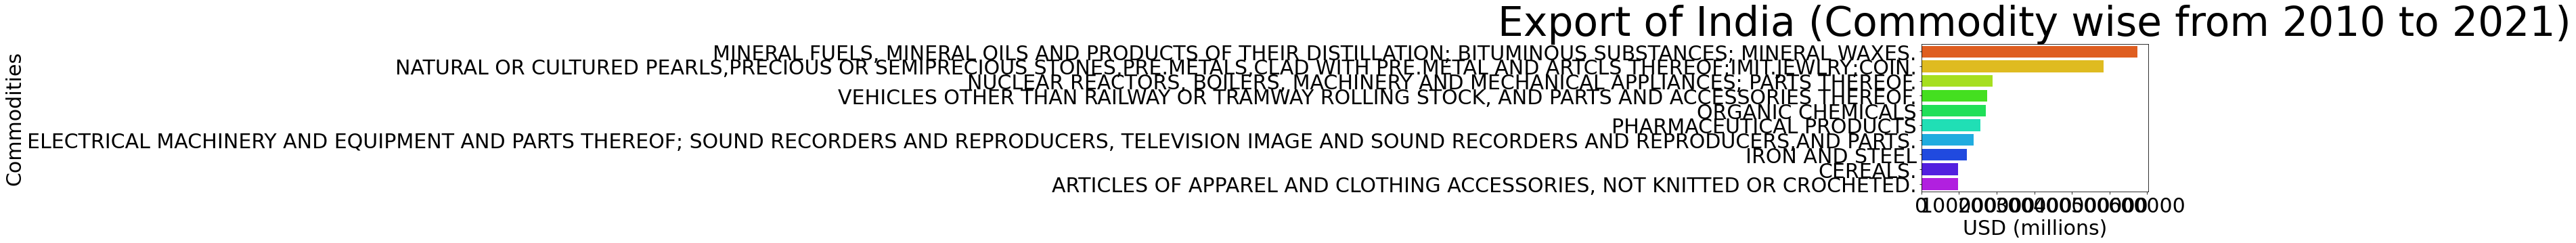

In [34]:
def bar_plot(x,y, xlabel, ylabel, label, color):
    global ax
    font_size = 30
    title_size = 60
    plt.rcParams['figure.figsize'] = (120,80)
    ax = sns.barplot(x, y, palette = color)
    ax.set_xlabel(xlabel = xlabel, fontsize = font_size)
    ax.set_ylabel(ylabel = ylabel, fontsize = font_size)
    ax.set_title(label = label, fontsize = title_size)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.show()
    
bar_plot(exp_comm.value, exp_comm.index, 'USD (millions)', 'Commodities', 'Export of India (Commodity wise from 2010 to 2021)', 'gist_rainbow')


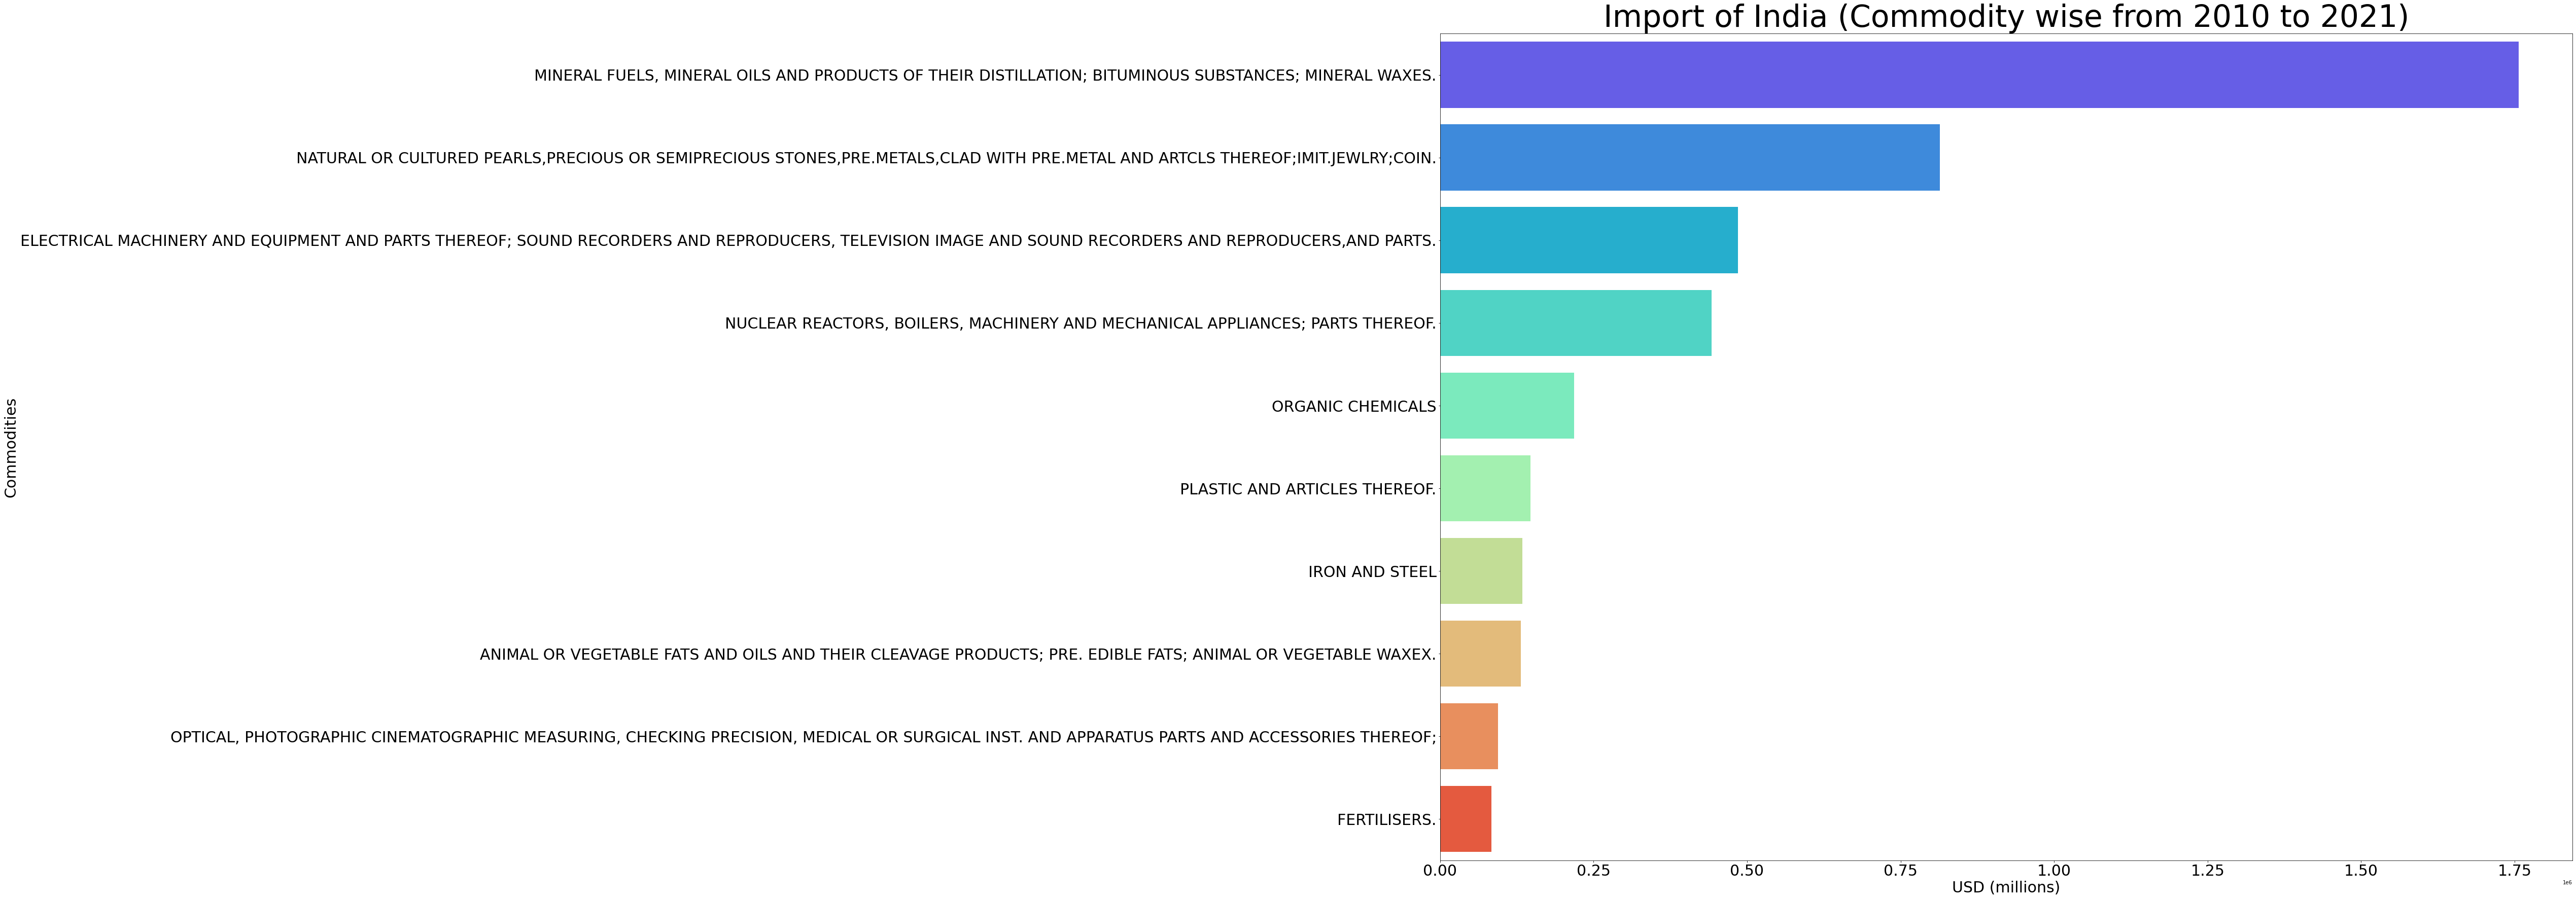

In [35]:
def bar_plot(x,y, xlabel, ylabel, label, color):
    global ax
    font_size = 30
    title_size = 60
    plt.rcParams['figure.figsize'] = (40, 30)
    ax = sns.barplot(x, y, palette = color)
    ax.set_xlabel(xlabel = xlabel, fontsize = font_size)
    ax.set_ylabel(ylabel = ylabel, fontsize = font_size)
    ax.set_title(label = label, fontsize = title_size)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.show()
bar_plot(imp_comm.value, imp_comm.index, 'USD (millions)', 'Commodities', 'Import of India (Commodity wise from 2010 to 2021)', 'rainbow')

In [36]:
exp_comm_table = pd.pivot_table(data_e, values = 'value', index = 'Commodity', columns = 'year')
imp_comm_table = pd.pivot_table(data_i, values = 'value', index = 'Commodity', columns = 'year')
print(exp_comm_table)

year                                                     2010       2011  \
Commodity                                                                  
AIRCRAFT, SPACECRAFT, AND PARTS THEREOF.            21.111013  25.854432   
ALBUMINOIDAL SUBSTANCES; MODIFIED STARCHES; GLU...   1.895906   1.435245   
ALUMINIUM AND ARTICLES THEREOF.                      7.186474   8.471299   
ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLE...   5.913492   8.399924   
ARMS AND AMMUNITION; PARTS AND ACCESSORIES THER...   0.370217   0.431311   
...                                                       ...        ...   
WADDING, FELT AND NONWOVENS; SPACIAL YARNS; TWI...   1.794155   2.108125   
WOOD AND ARTICLES OF WOOD; WOOD CHARCOAL.            1.019357   1.363491   
WOOL, FINE OR COARSE ANIMAL HAIR, HORSEHAIR YAR...   1.875412   2.511609   
WORKS OF ART COLLECTORS' PIECES AND ANTIQUES.        1.446726   1.564588   
ZINC AND ARTICLES THEREOF.                           9.723425   7.993789   

year       

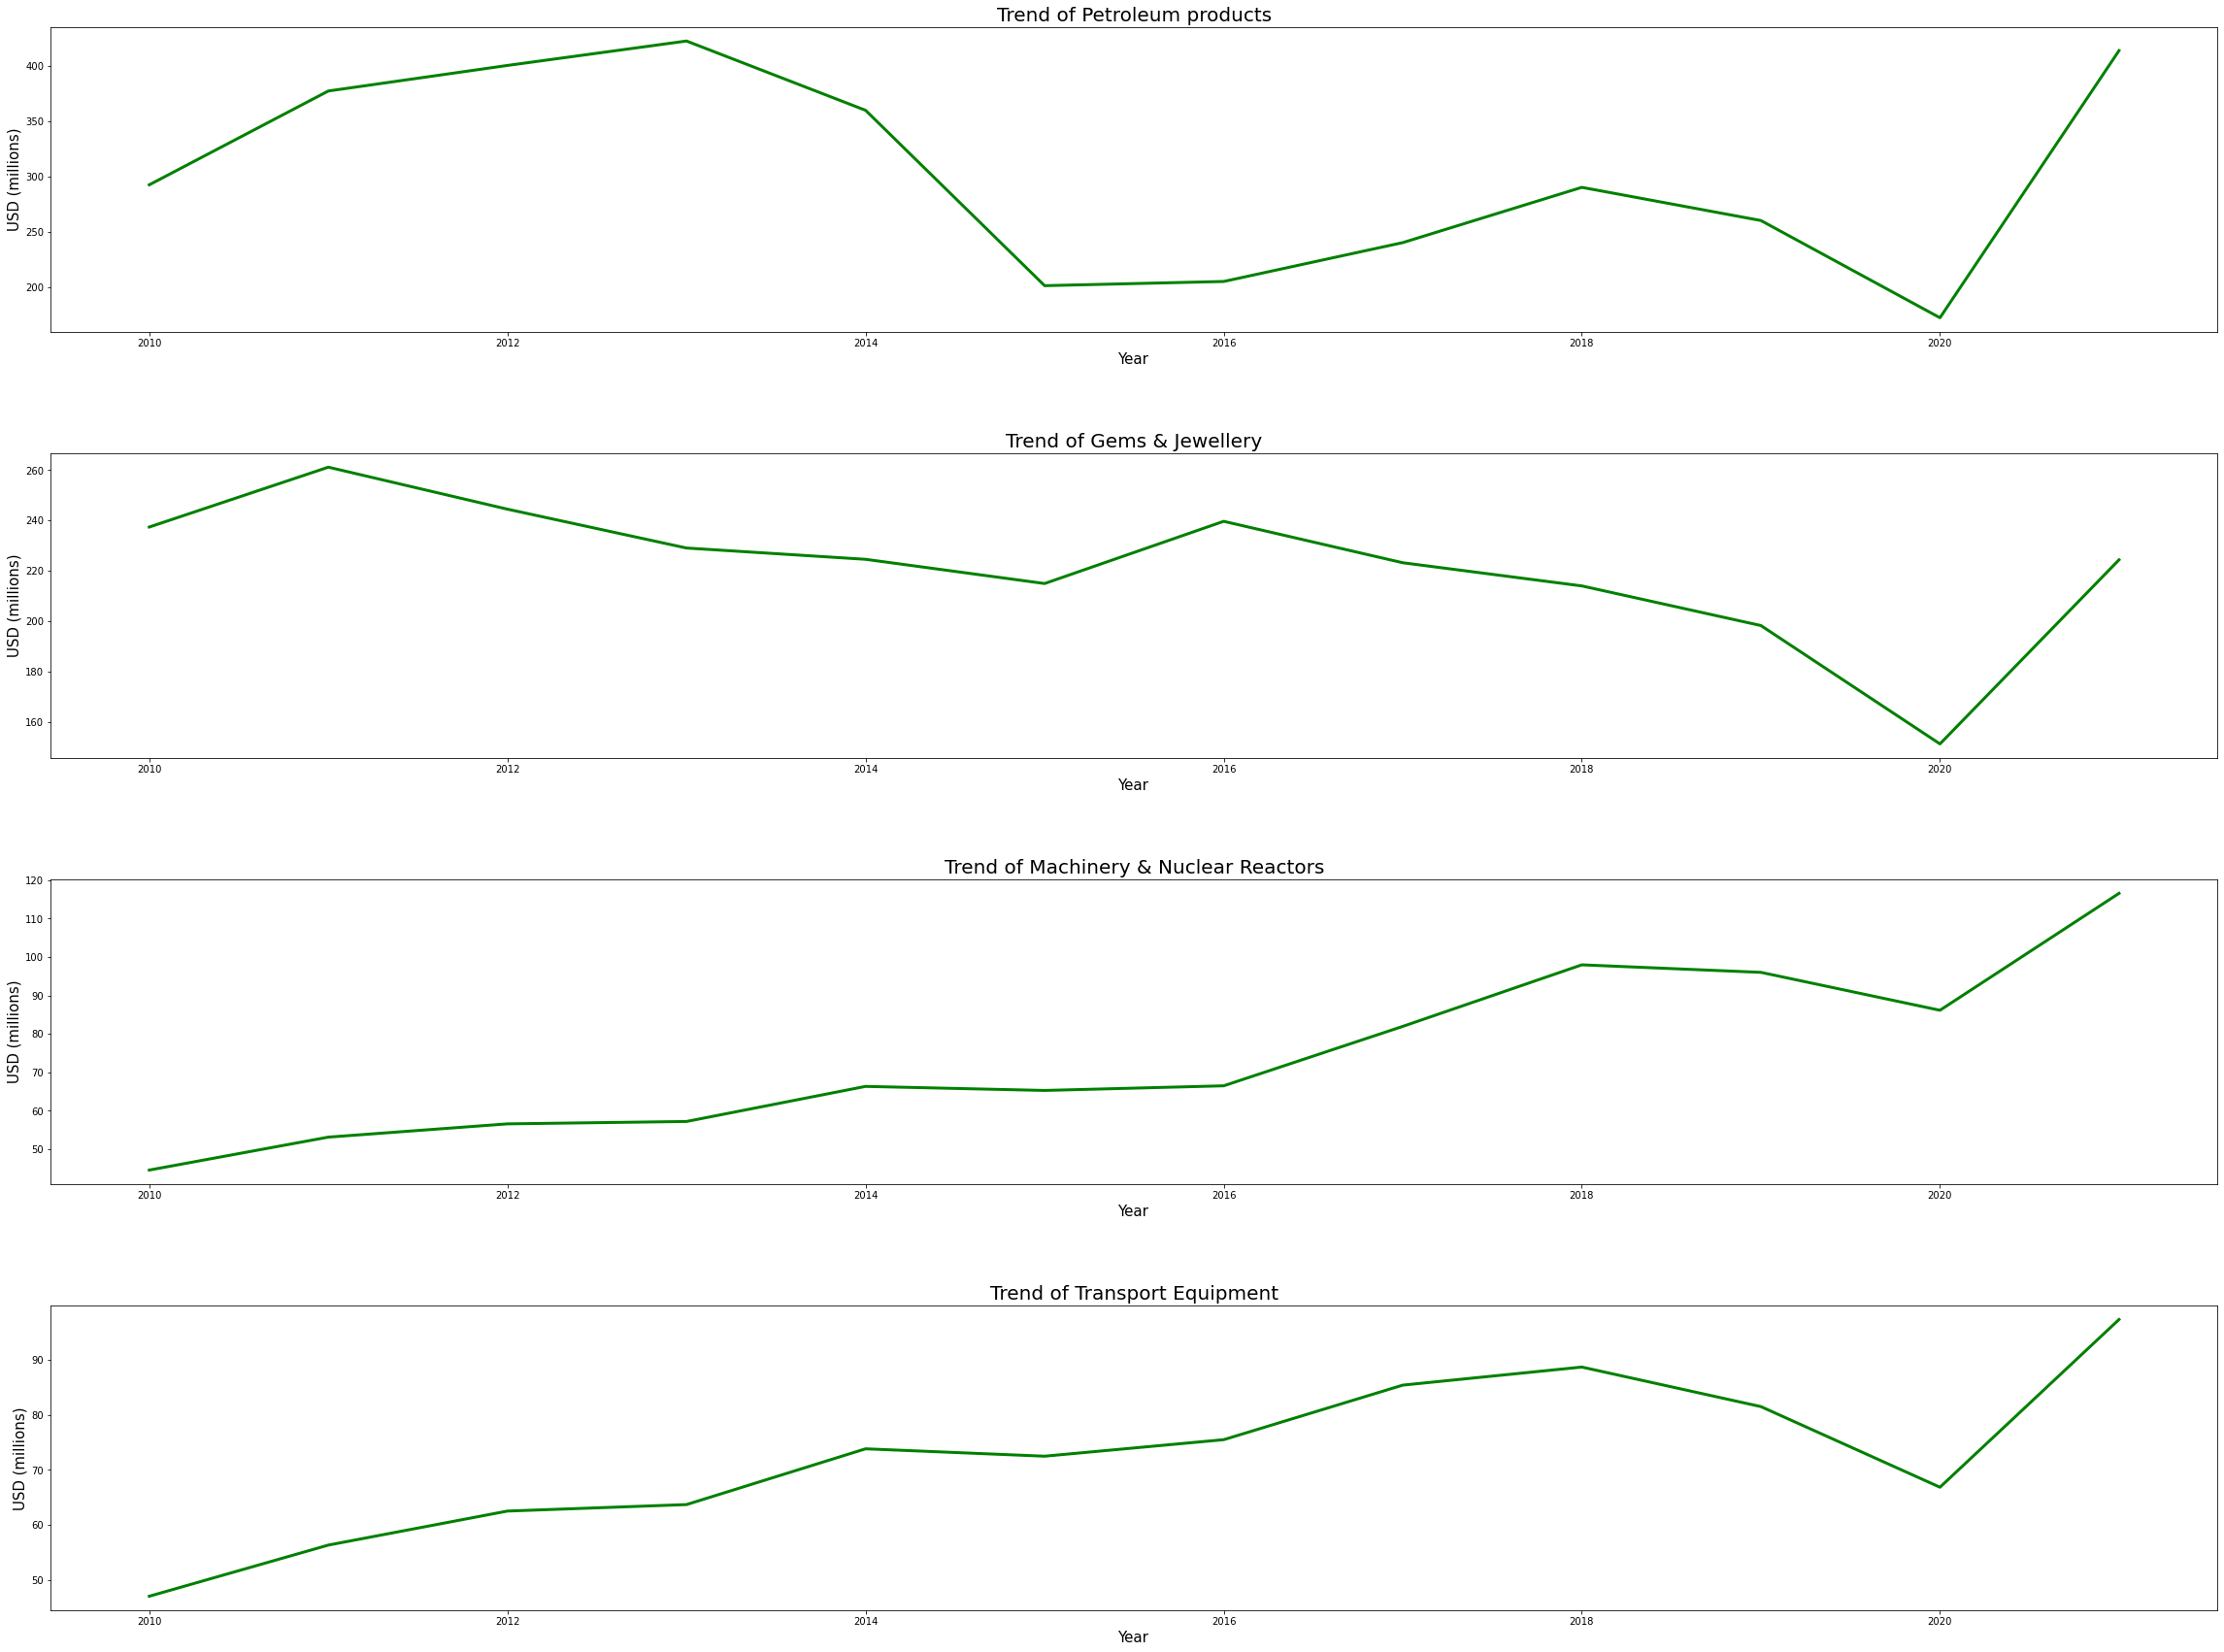

In [37]:
#most trading commodity growth graph

 
plt.subplot(411)
g = exp_comm_table.loc["MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES."].plot(color='green', linewidth=3)
g.set_ylabel('USD (millions)', fontsize = 15)
g.set_xlabel('Year', fontsize = 15)
g.set_title('Trend of Petroleum products', size = 20)

plt.subplot(412)
g1 = exp_comm_table.loc["NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN."].plot(color='green', linewidth=3)
g1.set_ylabel('USD (millions)', fontsize = 15)
g1.set_xlabel('Year', fontsize = 15)
g1.set_title('Trend of Gems & Jewellery', size = 20)

plt.subplot(413)
g3 = exp_comm_table.loc["NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF."].plot(color='green', linewidth=3)
g3.set_ylabel('USD (millions)', fontsize = 15)
g3.set_xlabel('Year', fontsize = 15)
g3.set_title('Trend of Machinery & Nuclear Reactors', size = 20)

plt.subplot(414)
g2 = exp_comm_table.loc["VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING STOCK, AND PARTS AND ACCESSORIES THEREOF."].plot(color='green', linewidth=3)
g2.set_ylabel('USD (millions)', fontsize = 15)
g2.set_xlabel('Year', fontsize = 15)
g2.set_title('Trend of Transport Equipment', size = 20)




plt.subplots_adjust(hspace = 0.4)
plt.show()

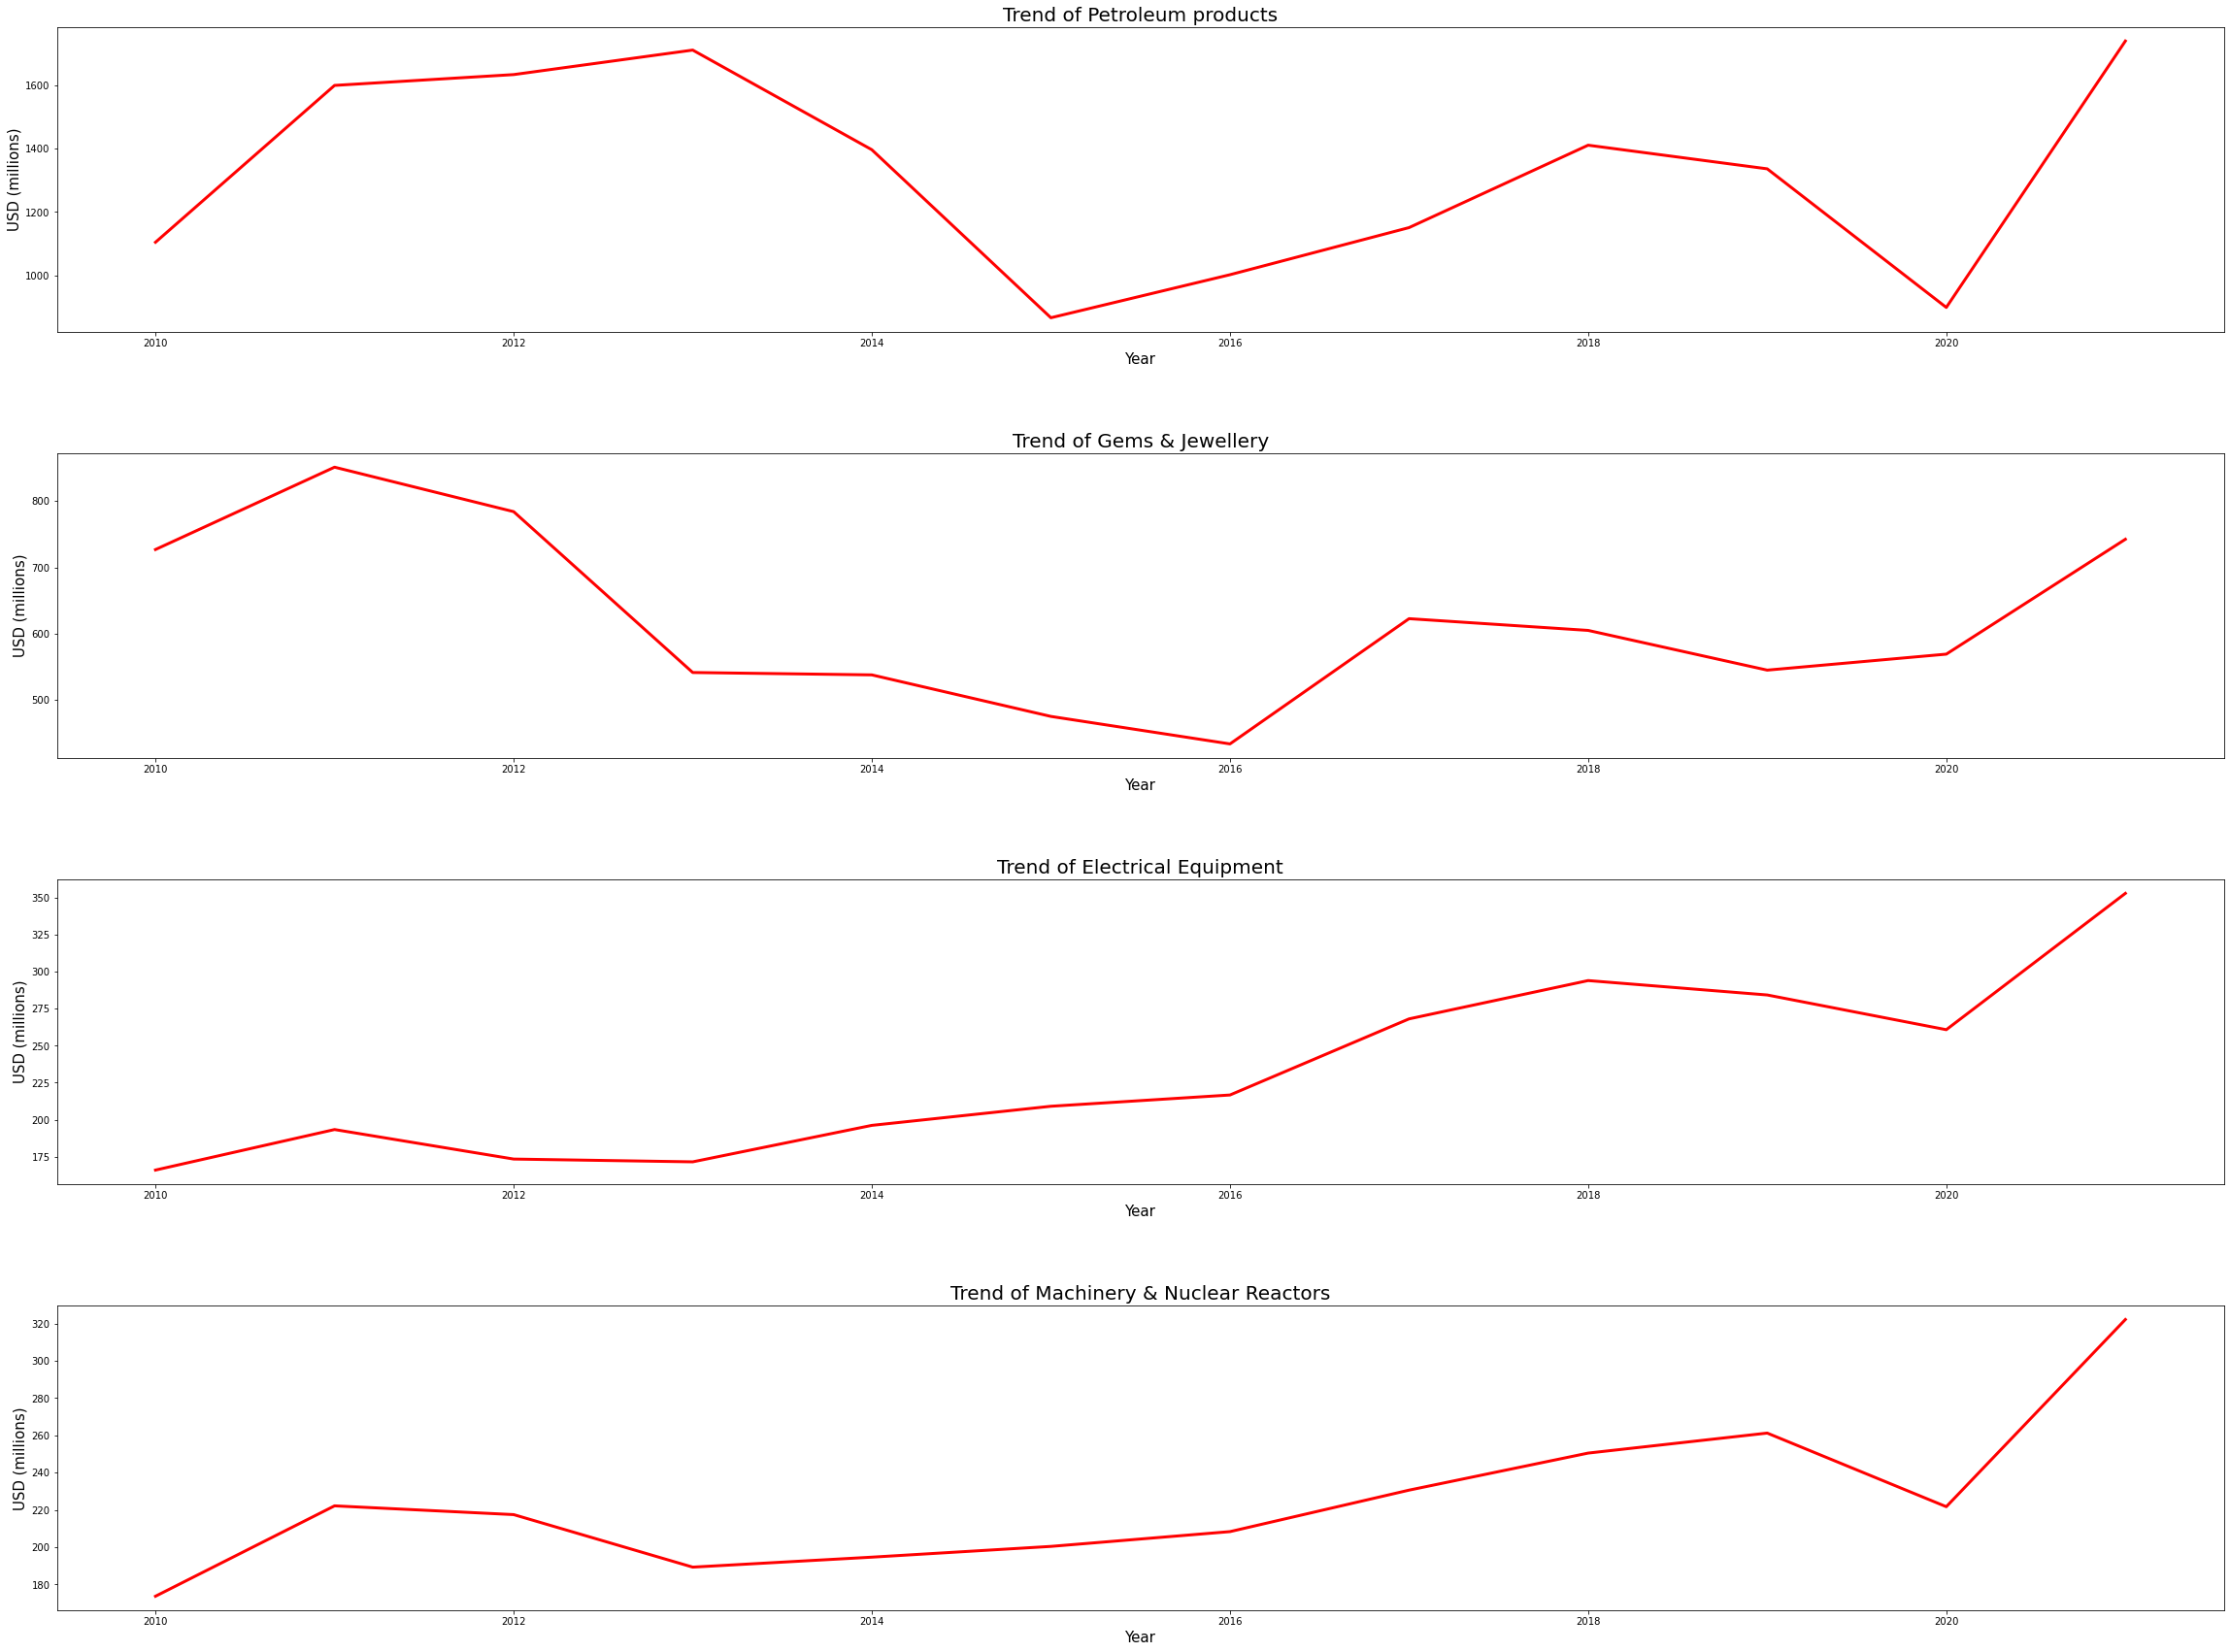

In [38]:
plt.subplot(411)
g = imp_comm_table.loc["MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES."].plot(color='red', linewidth=3)
g.set_ylabel('USD (millions)', fontsize = 15)
g.set_xlabel('Year', fontsize = 15)
g.set_title('Trend of Petroleum products', size = 20)

plt.subplot(412)
g1 = imp_comm_table.loc["NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN."].plot(color='red', linewidth=3)
g1.set_ylabel('USD (millions)', fontsize = 15)
g1.set_xlabel('Year', fontsize = 15)
g1.set_title('Trend of Gems & Jewellery', size = 20)

plt.subplot(413)
g2 = imp_comm_table.loc["ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS."].plot(color='red', linewidth=3)
g2.set_ylabel('USD (millions)', fontsize = 15)
g2.set_xlabel('Year', fontsize = 15)
g2.set_title('Trend of Electrical Equipment', size = 20)


plt.subplot(414)
g3 = imp_comm_table.loc["NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF."].plot(color='red', linewidth=3)
g3.set_ylabel('USD (millions)', fontsize = 15)
g3.set_xlabel('Year', fontsize = 15)
g3.set_title('Trend of Machinery & Nuclear Reactors', size = 20)

plt.subplots_adjust(hspace = 0.4)
plt.show()

6.5 : Country wise analysis

In [39]:
print("Total countries for exports",data_e['country'].nunique())
print("Total countries for imports",data_i['country'].nunique())

Total countries for exports 249
Total countries for imports 242


In [40]:
exp_country = data_e.groupby('country').agg({'value':'sum'})
exp_country = exp_country.rename(columns={'value': 'Export'})
exp_country = exp_country.sort_values(by = 'Export', ascending = False)
exp_country = exp_country[:10]

imp_country = data_i.groupby('country').agg({'value':'sum'})
imp_country = imp_country.rename(columns={'value': 'Import'})
imp_country = imp_country.sort_values(by = 'Import', ascending = False)
imp_country = imp_country[:10]

6.6 : Visualization of country wise analysis

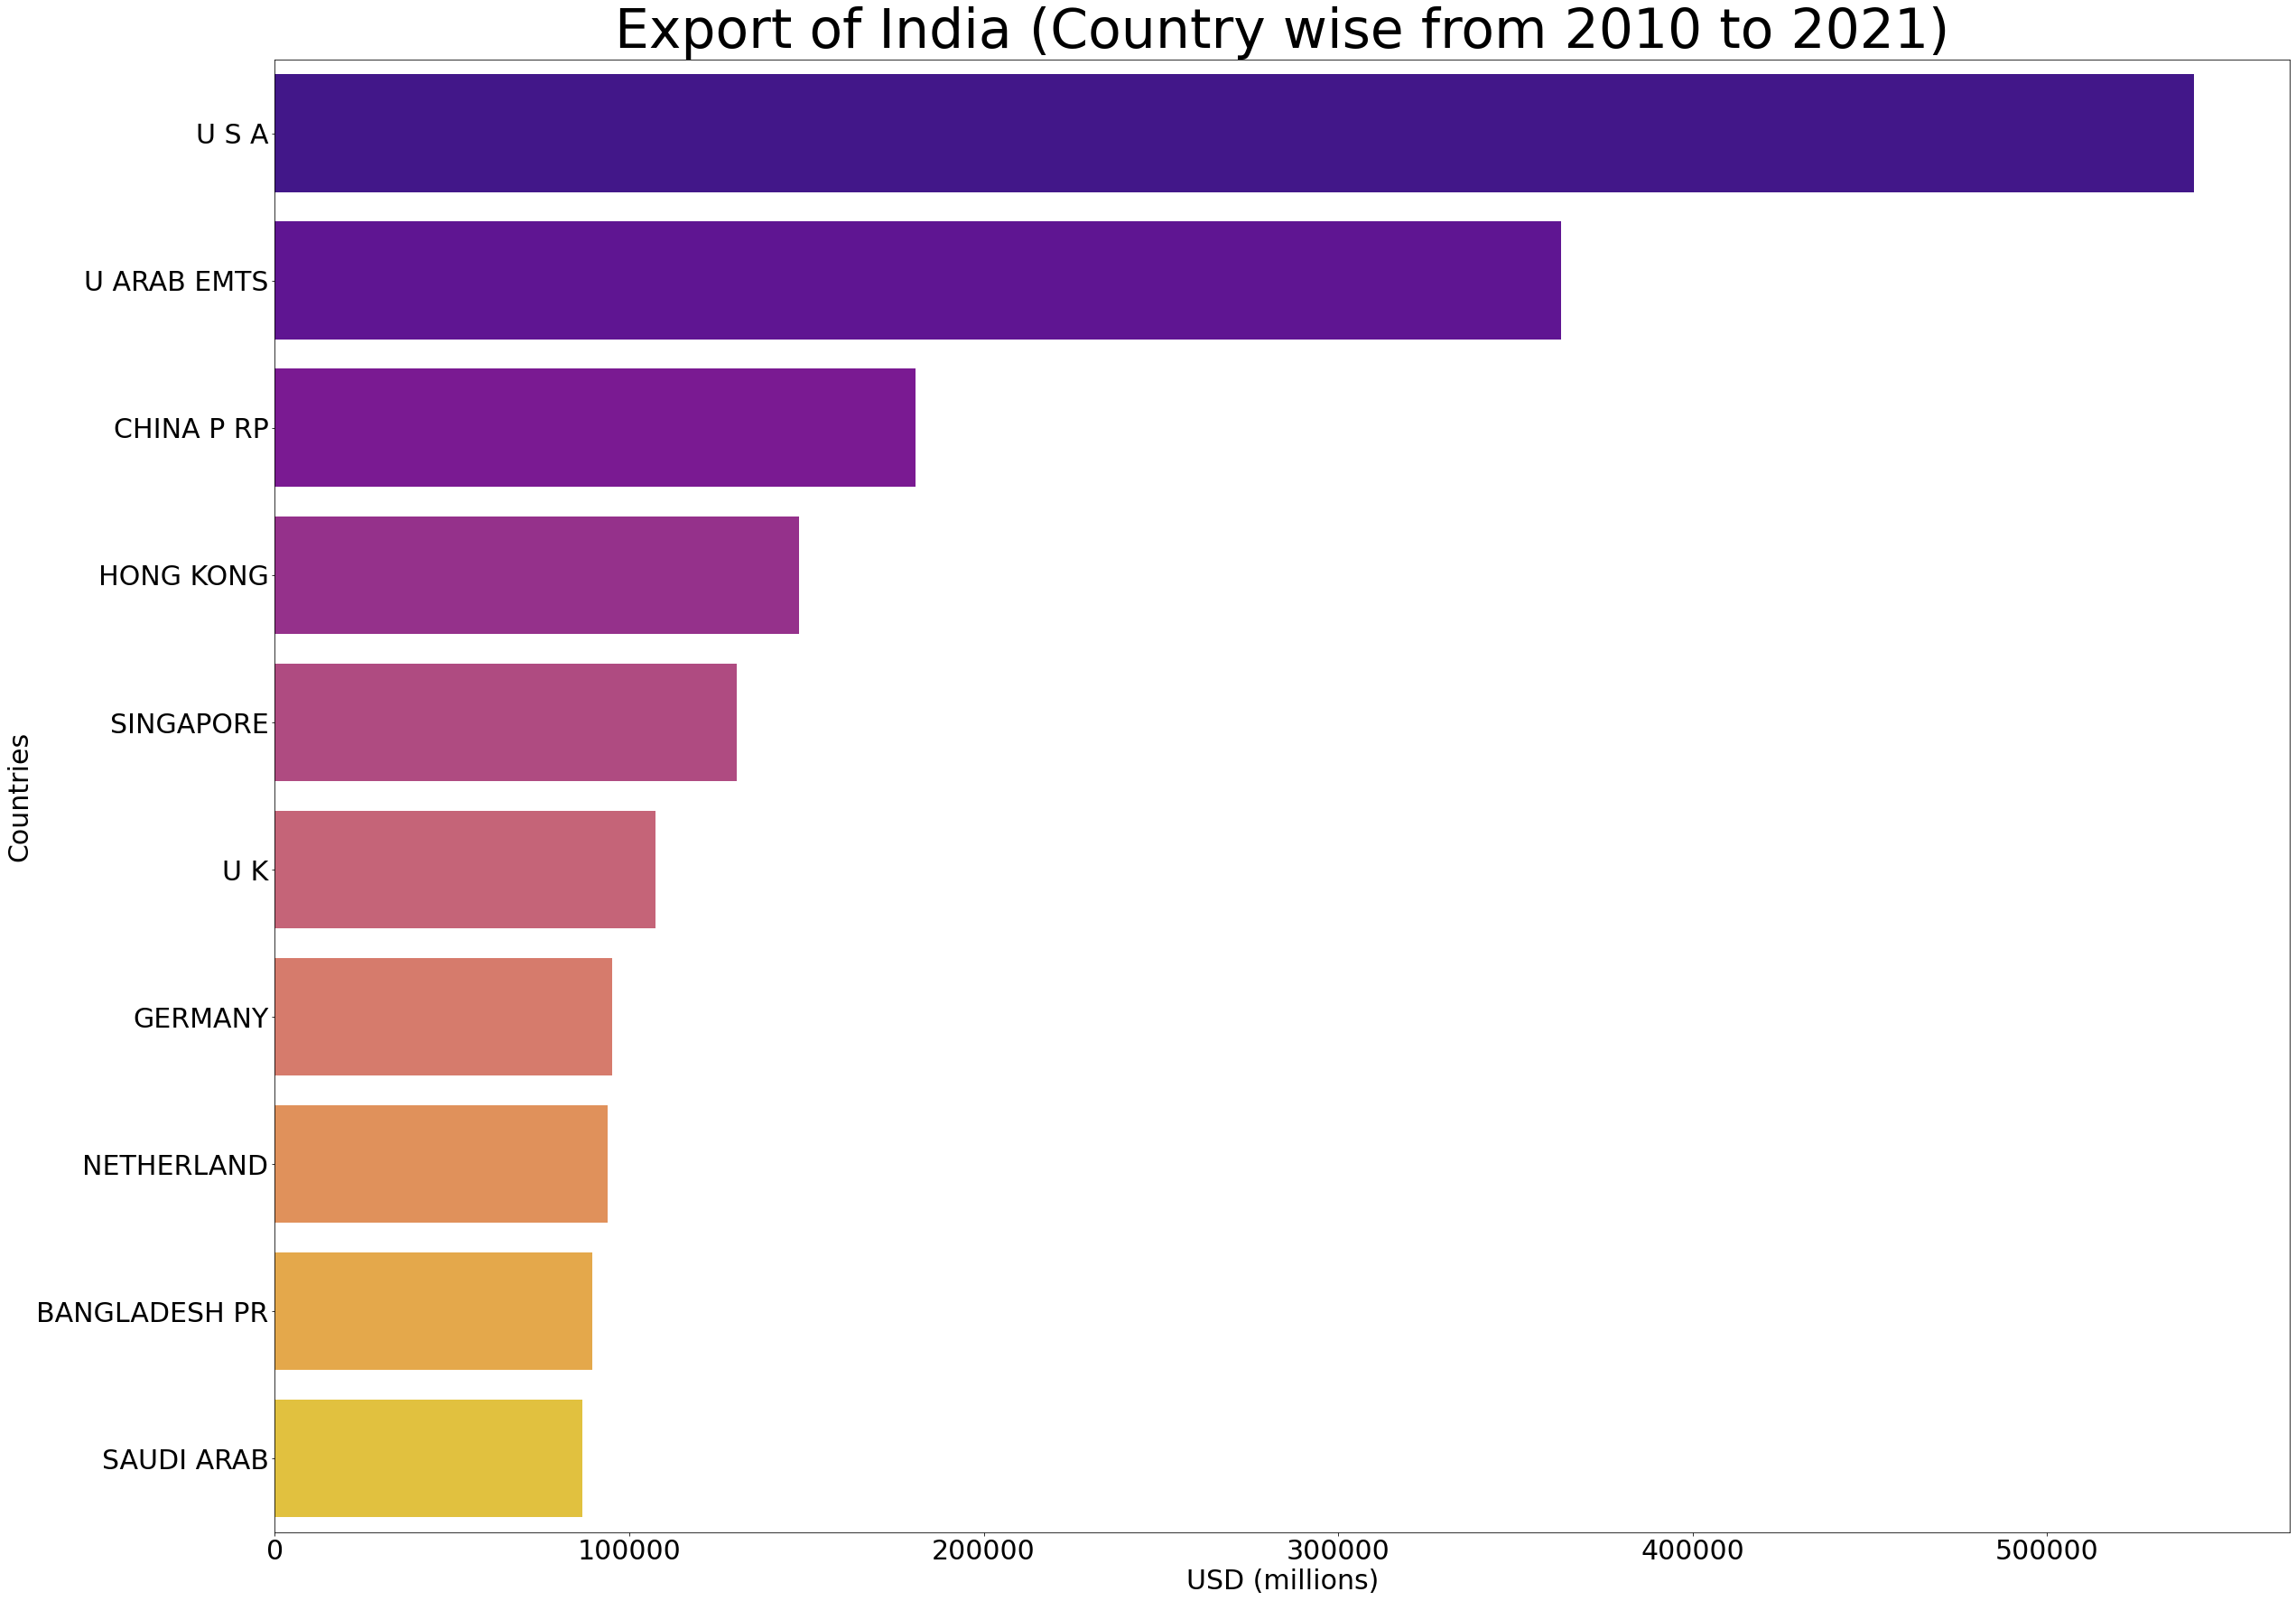

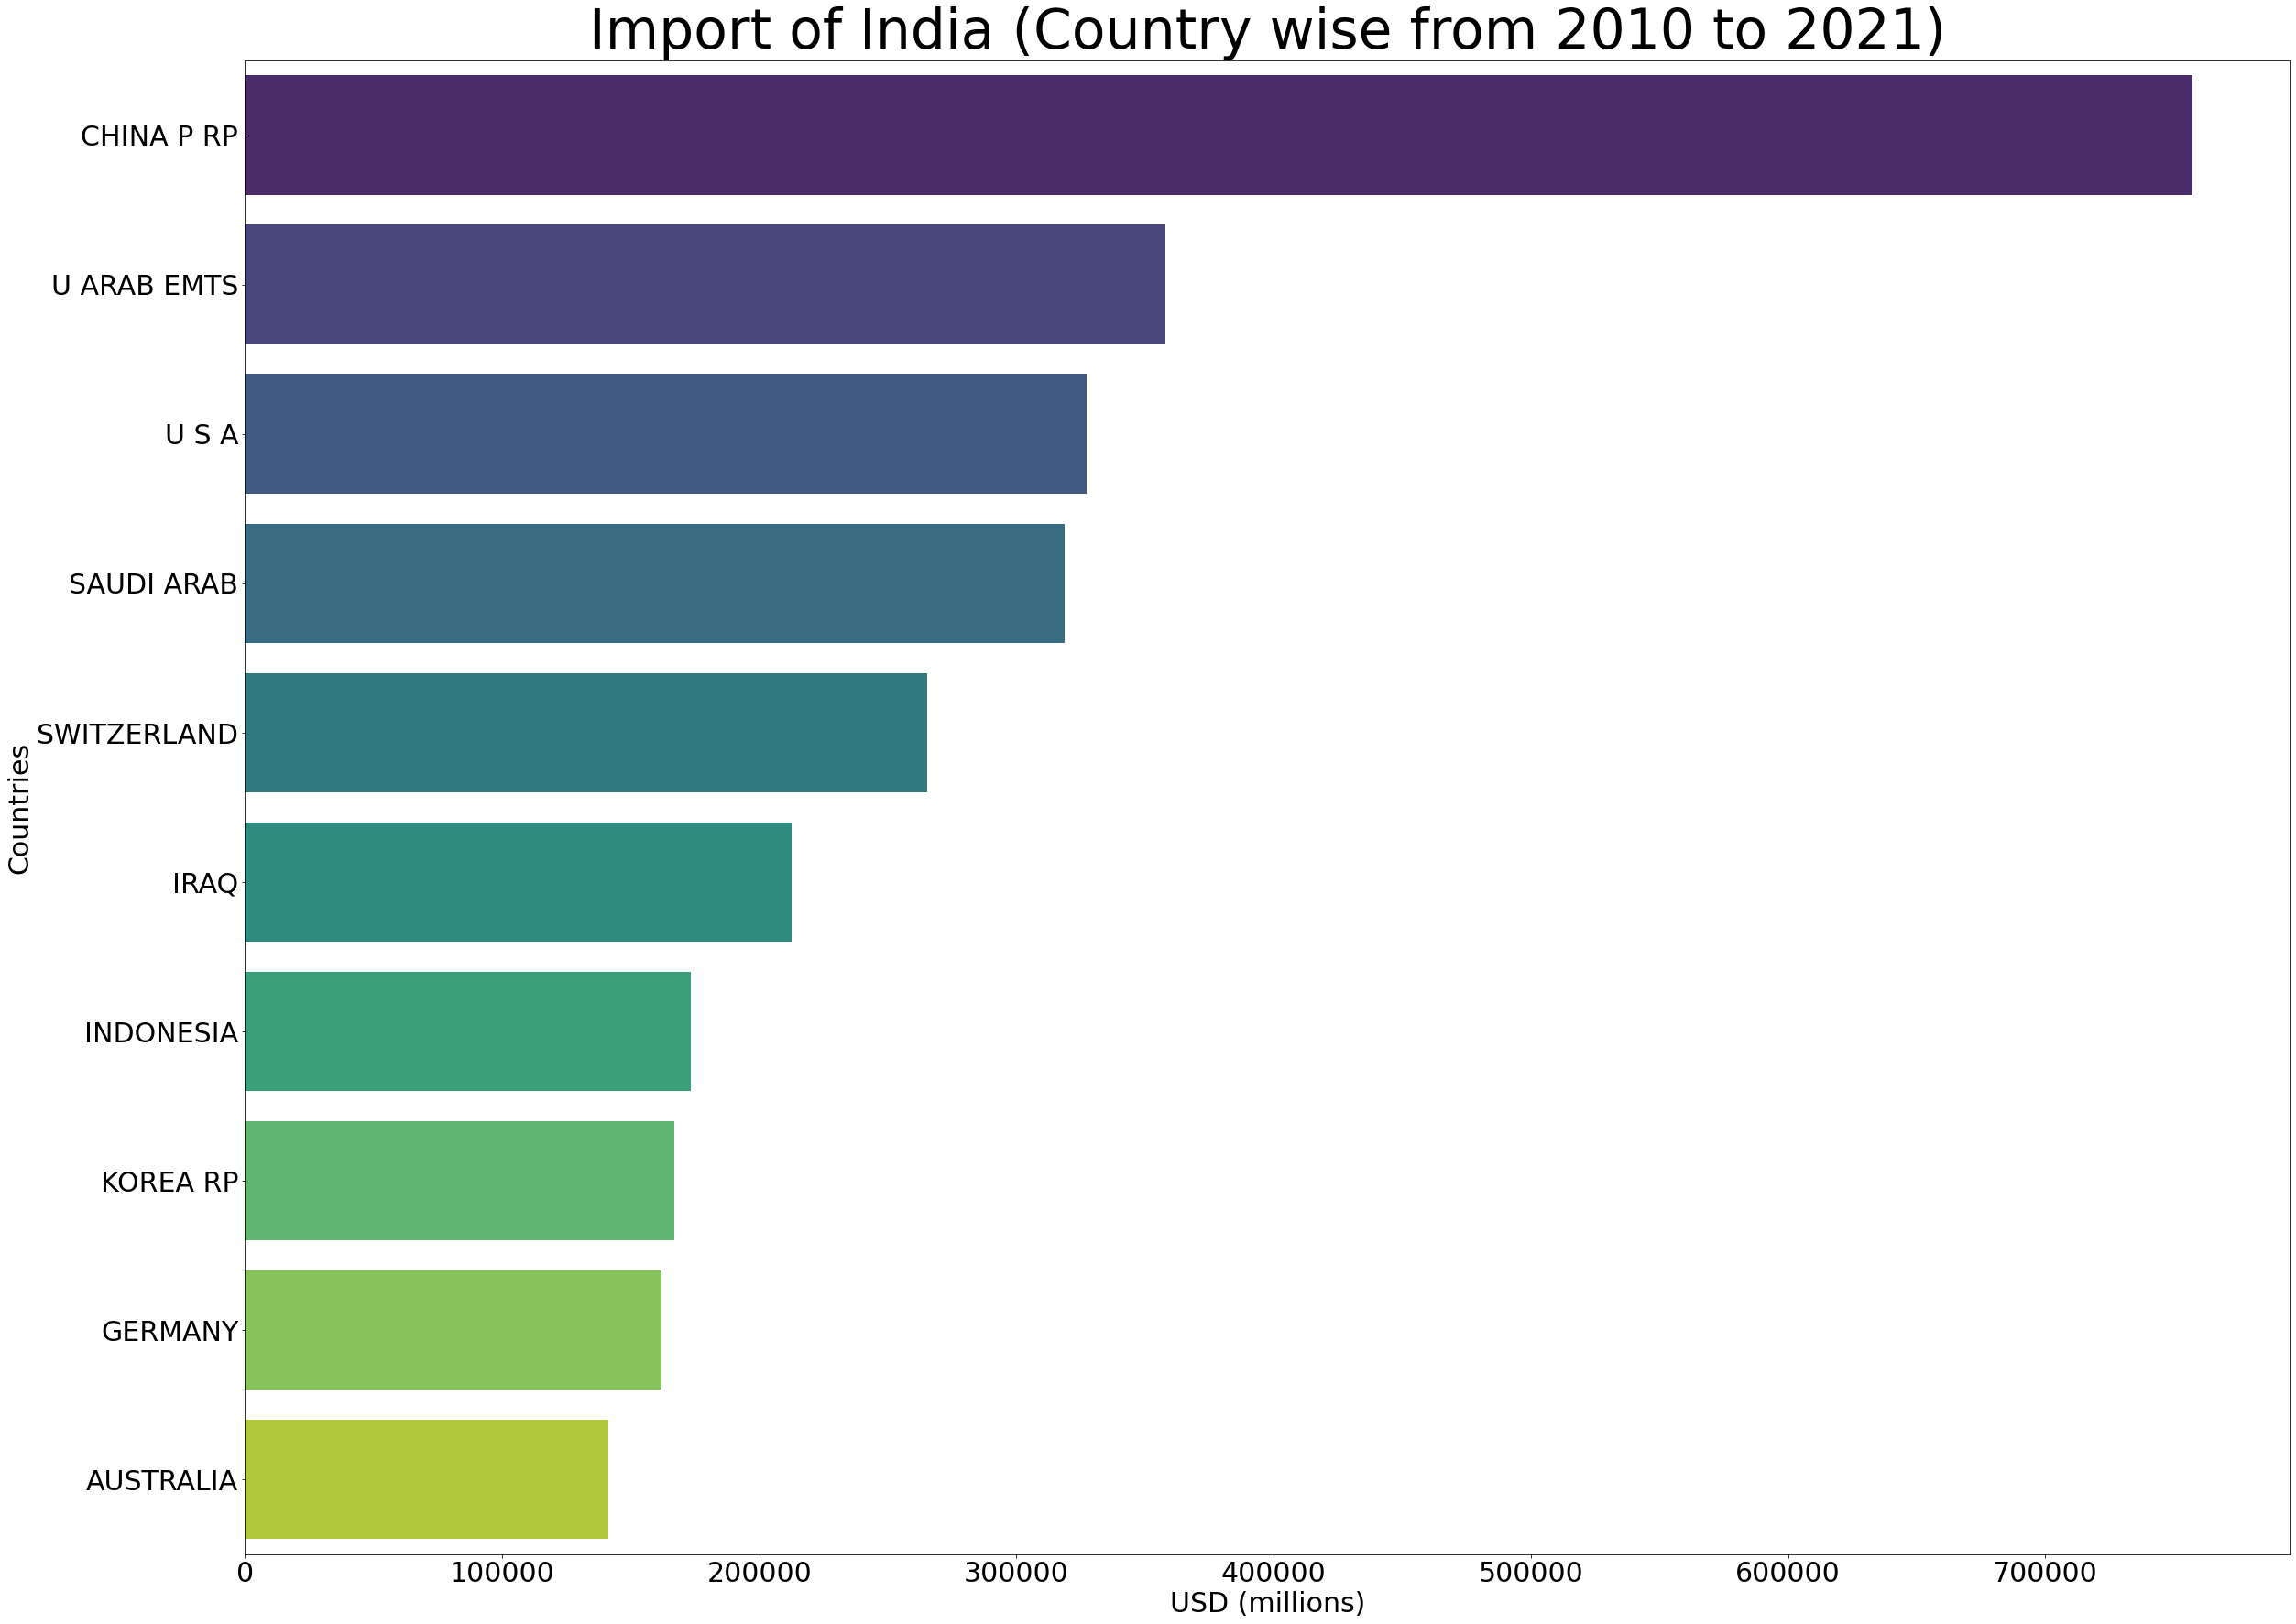

In [41]:
bar_plot(exp_country.Export, exp_country.index, 'USD (millions)', 'Countries', 'Export of India (Country wise from 2010 to 2021)', 'plasma')
bar_plot(imp_country.Import, imp_country.index, 'USD (millions)', 'Countries', 'Import of India (Country wise from 2010 to 2021)', 'viridis')


This visual shows that China and UAE are the top 2 countries from which imports are maximum processed.
And, USA and UAE are the top 2 countries where exports are maximum processed. 

In [42]:
#Calculating trade deficit country wise

total_country = pd.concat([exp_country, imp_country], axis = 1)
total_country['Trade Deficit'] = exp_country.Export - imp_country.Import
total_country = total_country.sort_values(by = 'Trade Deficit', ascending = False)
total_country = total_country[:10]

In [43]:
print("Table 1\n",total_country)
print("\n Descriptive Statistics \n")
print(total_country.describe())

Table 1
                   Export     Import  Trade Deficit
country                                           
U S A          541487.45  327297.77      214189.68
U ARAB EMTS    362951.83  357998.58        4953.25
GERMANY         95153.81  161966.07      -66812.26
SAUDI ARAB      86847.66  318699.57     -231851.91
CHINA P RP     180865.06  757219.93     -576354.87
HONG KONG      147807.24        NaN            NaN
SINGAPORE      130427.76        NaN            NaN
U K            107298.44        NaN            NaN
NETHERLAND      93963.12        NaN            NaN
BANGLADESH PR   89520.36        NaN            NaN

 Descriptive Statistics 

              Export         Import  Trade Deficit
count      10.000000       5.000000       5.000000
mean   183632.273000  384636.384000 -131175.222000
std    150649.632092  221780.026256  295918.562192
min     86847.660000  161966.070000 -576354.870000
25%     94260.792500  318699.570000 -231851.910000
50%    118863.100000  327297.770000  -66812.26

In [44]:
#Graph of Expors and imports wcountry wise (Top 10)

bar1 = go.Bar(
                x = total_country.index,
                y = total_country.Export,
                name = "Export",
                marker = dict(color = 'rgb(204,0,102)',
                             line=dict(color='rgb(0,0,0)',width=1.0)),
                text = total_year.Export)
# create trace2 
bar2 = go.Bar(
                x = total_country.index,
                y = total_country.Import,
                name = "Import",
                marker = dict(color = 'rgb(102, 0, 51)',
                              line=dict(color='rgb(0,0,0)',width=1.0)),
                text = total_year.Import)
# create trace3
bar3 = go.Bar(
                x = total_country.index,
                y = total_country['Trade Deficit'],
                name = "Trade Deficit",
                marker = dict(color = 'crimson',
                              line=dict(color='rgb(0,0,0)',width=1.0)),
                text = total_year['Trade Deficit'])

layout = go.Layout(hovermode= 'closest', title = 'Export/Import and Trade Deficit of Indian Trade from 2010 to 2021(Country Wise)' , xaxis = dict(title = 'Country'), yaxis = dict(title = 'USD (millions)'))
fig = go.Figure(data = [bar1, bar2, bar3], layout = layout)
fig.show()

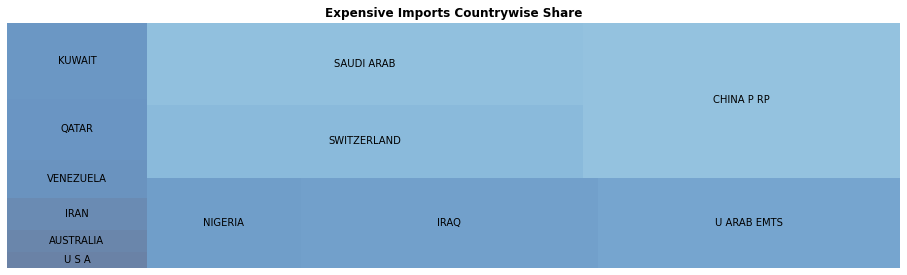

In [45]:
#Expensive import and export country wise share chart

expensive_import = data_i.sort_values(by='value',  ascending=False).head(100)

import squarify
import matplotlib
temp1 = expensive_import.groupby(['country']).agg({'value': 'sum'})
temp1 = temp1.sort_values(by='value')

norm = matplotlib.colors.Normalize(vmin=min(expensive_import.value), vmax=max(expensive_import.value))
colors = [matplotlib.cm.Blues(norm(value)) for value in expensive_import.value]

value=np.array(temp1)
country=temp1.index
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)
squarify.plot(sizes=value, label=country, color = colors, alpha=.6)
plt.title("Expensive Imports Countrywise Share", fontweight="bold")
plt.axis('off')
plt.show()

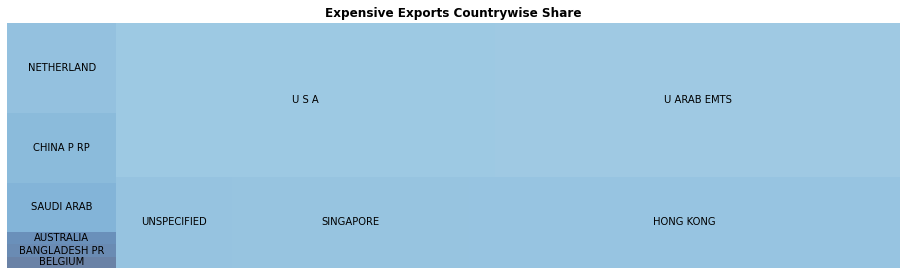

In [46]:
expensive_export = data_e.sort_values(by='value',  ascending=False).head(100)

import squarify
import matplotlib
temp1 = expensive_export.groupby(['country']).agg({'value': 'sum'})
temp1 = temp1.sort_values(by='value')

norm = matplotlib.colors.Normalize(vmin=min(expensive_export.value), vmax=max(expensive_export.value))
colors = [matplotlib.cm.Blues(norm(value)) for value in expensive_export.value]

value=np.array(temp1)
country=temp1.index
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)
squarify.plot(sizes=value, label=country, color = colors, alpha=.6)
plt.title("Expensive Exports Countrywise Share", fontweight="bold")
plt.axis('off')
plt.show()

<AxesSubplot:>

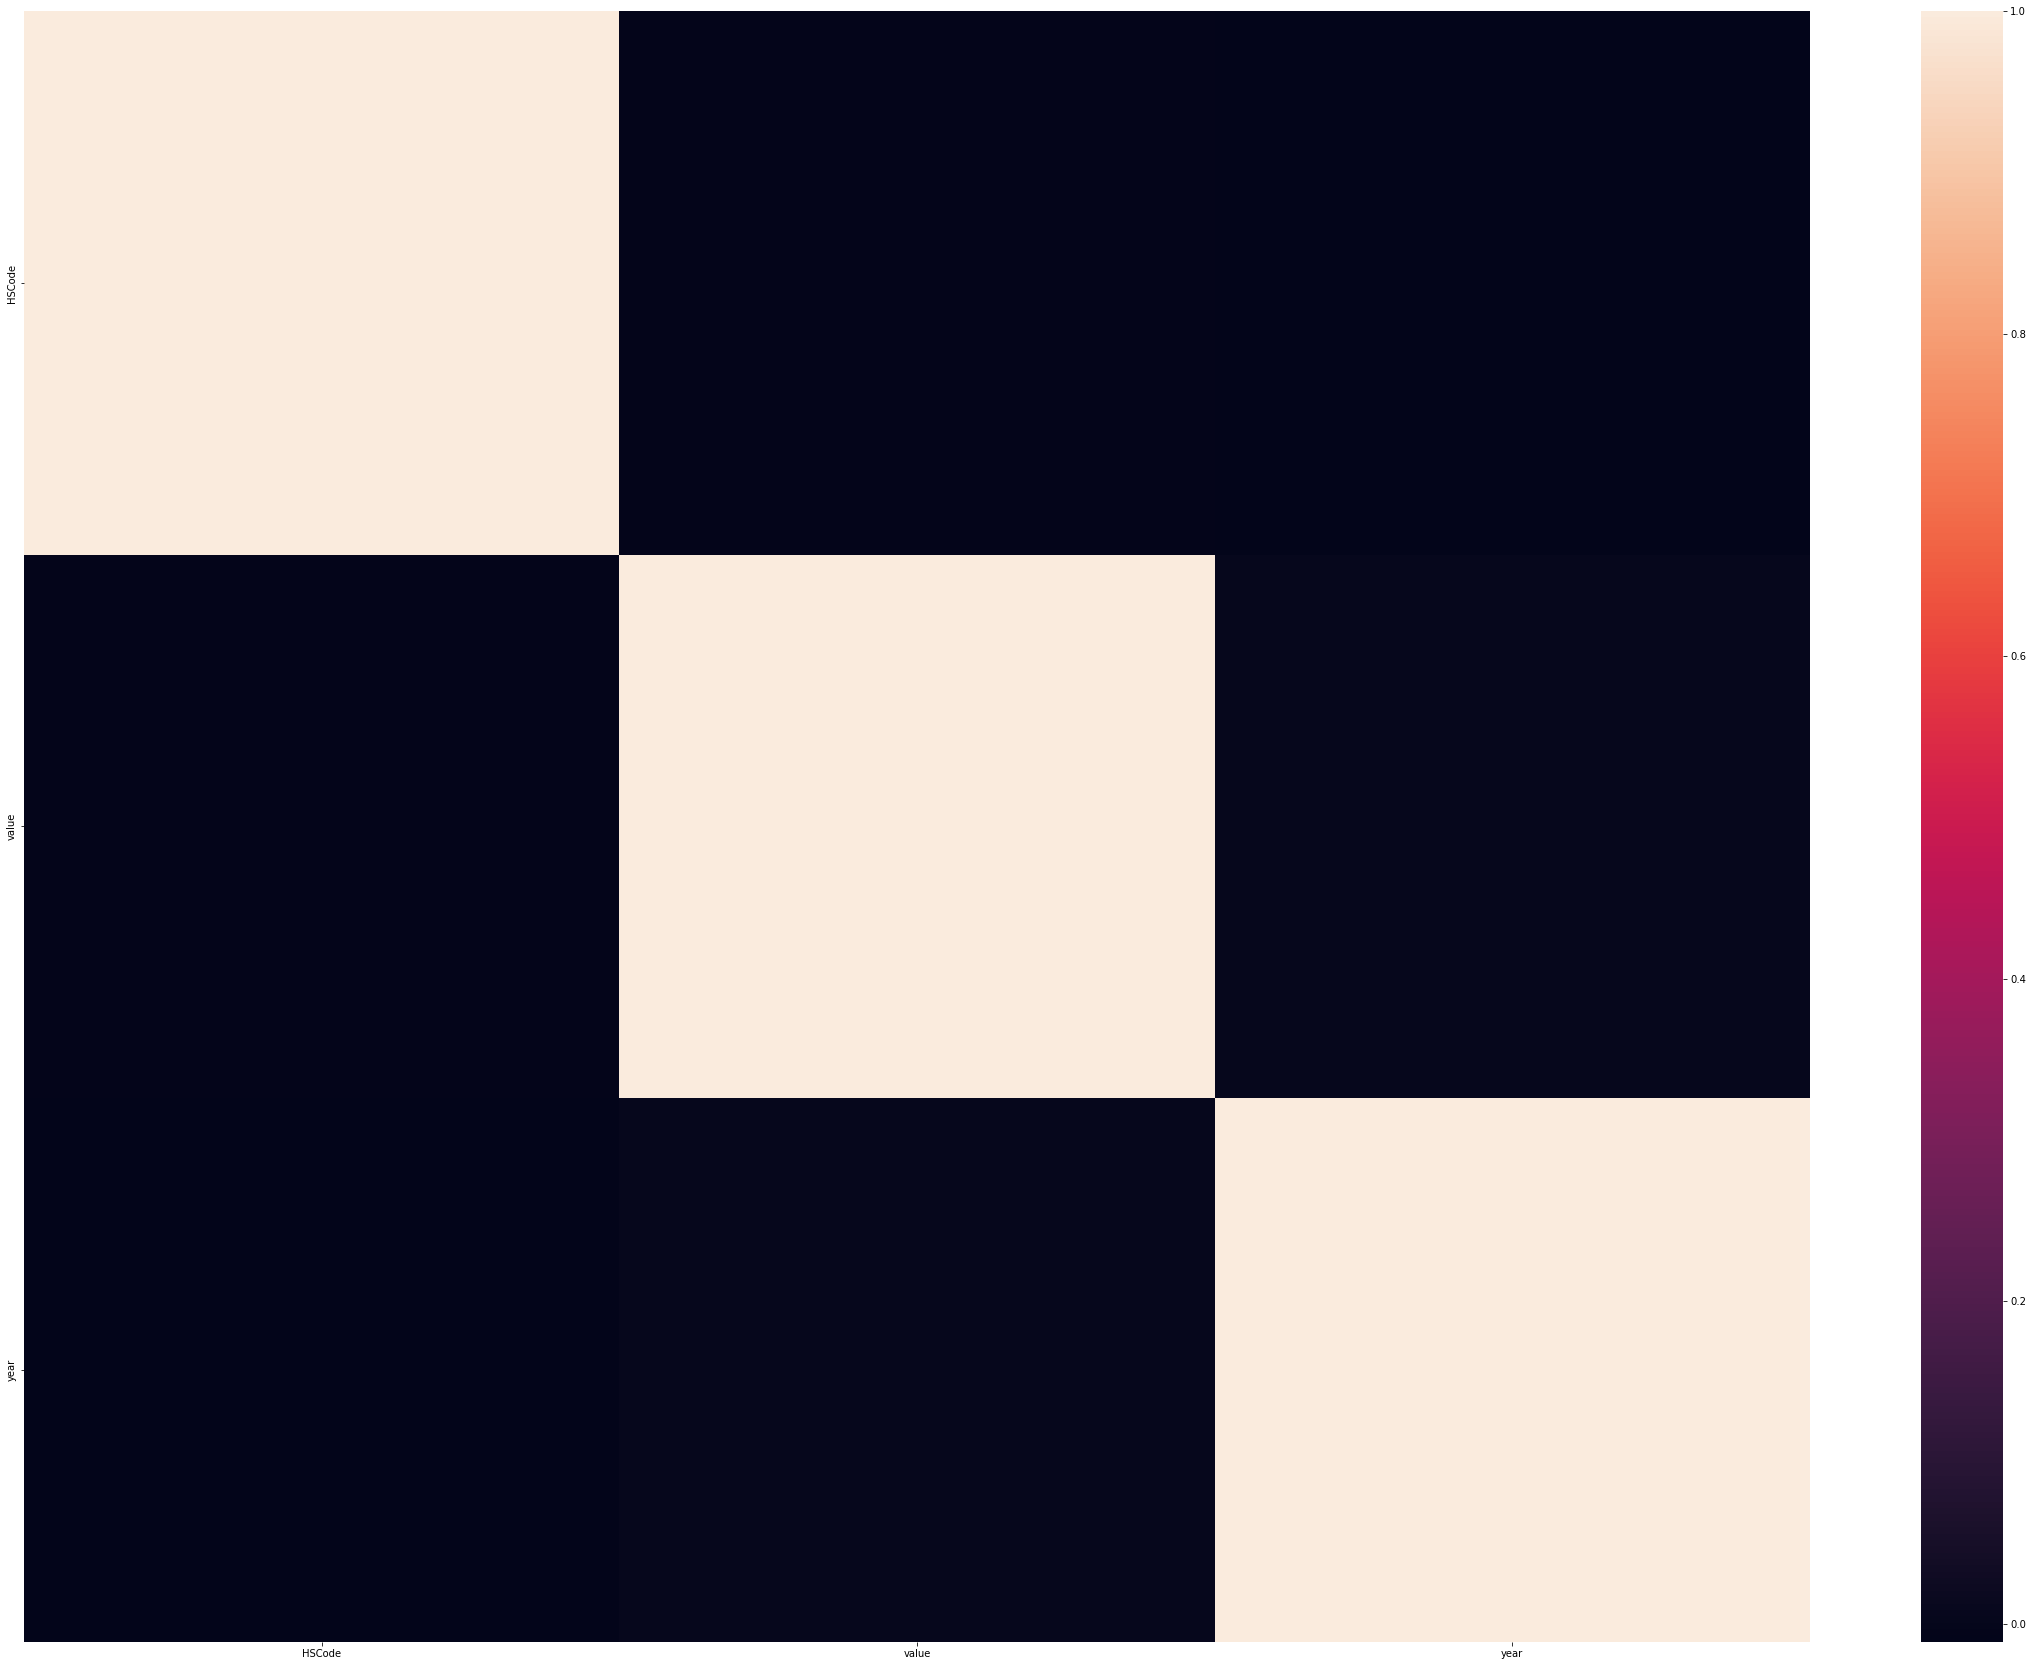

In [51]:
corr_matrix = data_i.corr()
sns.heatmap(corr_matrix)

<AxesSubplot:>

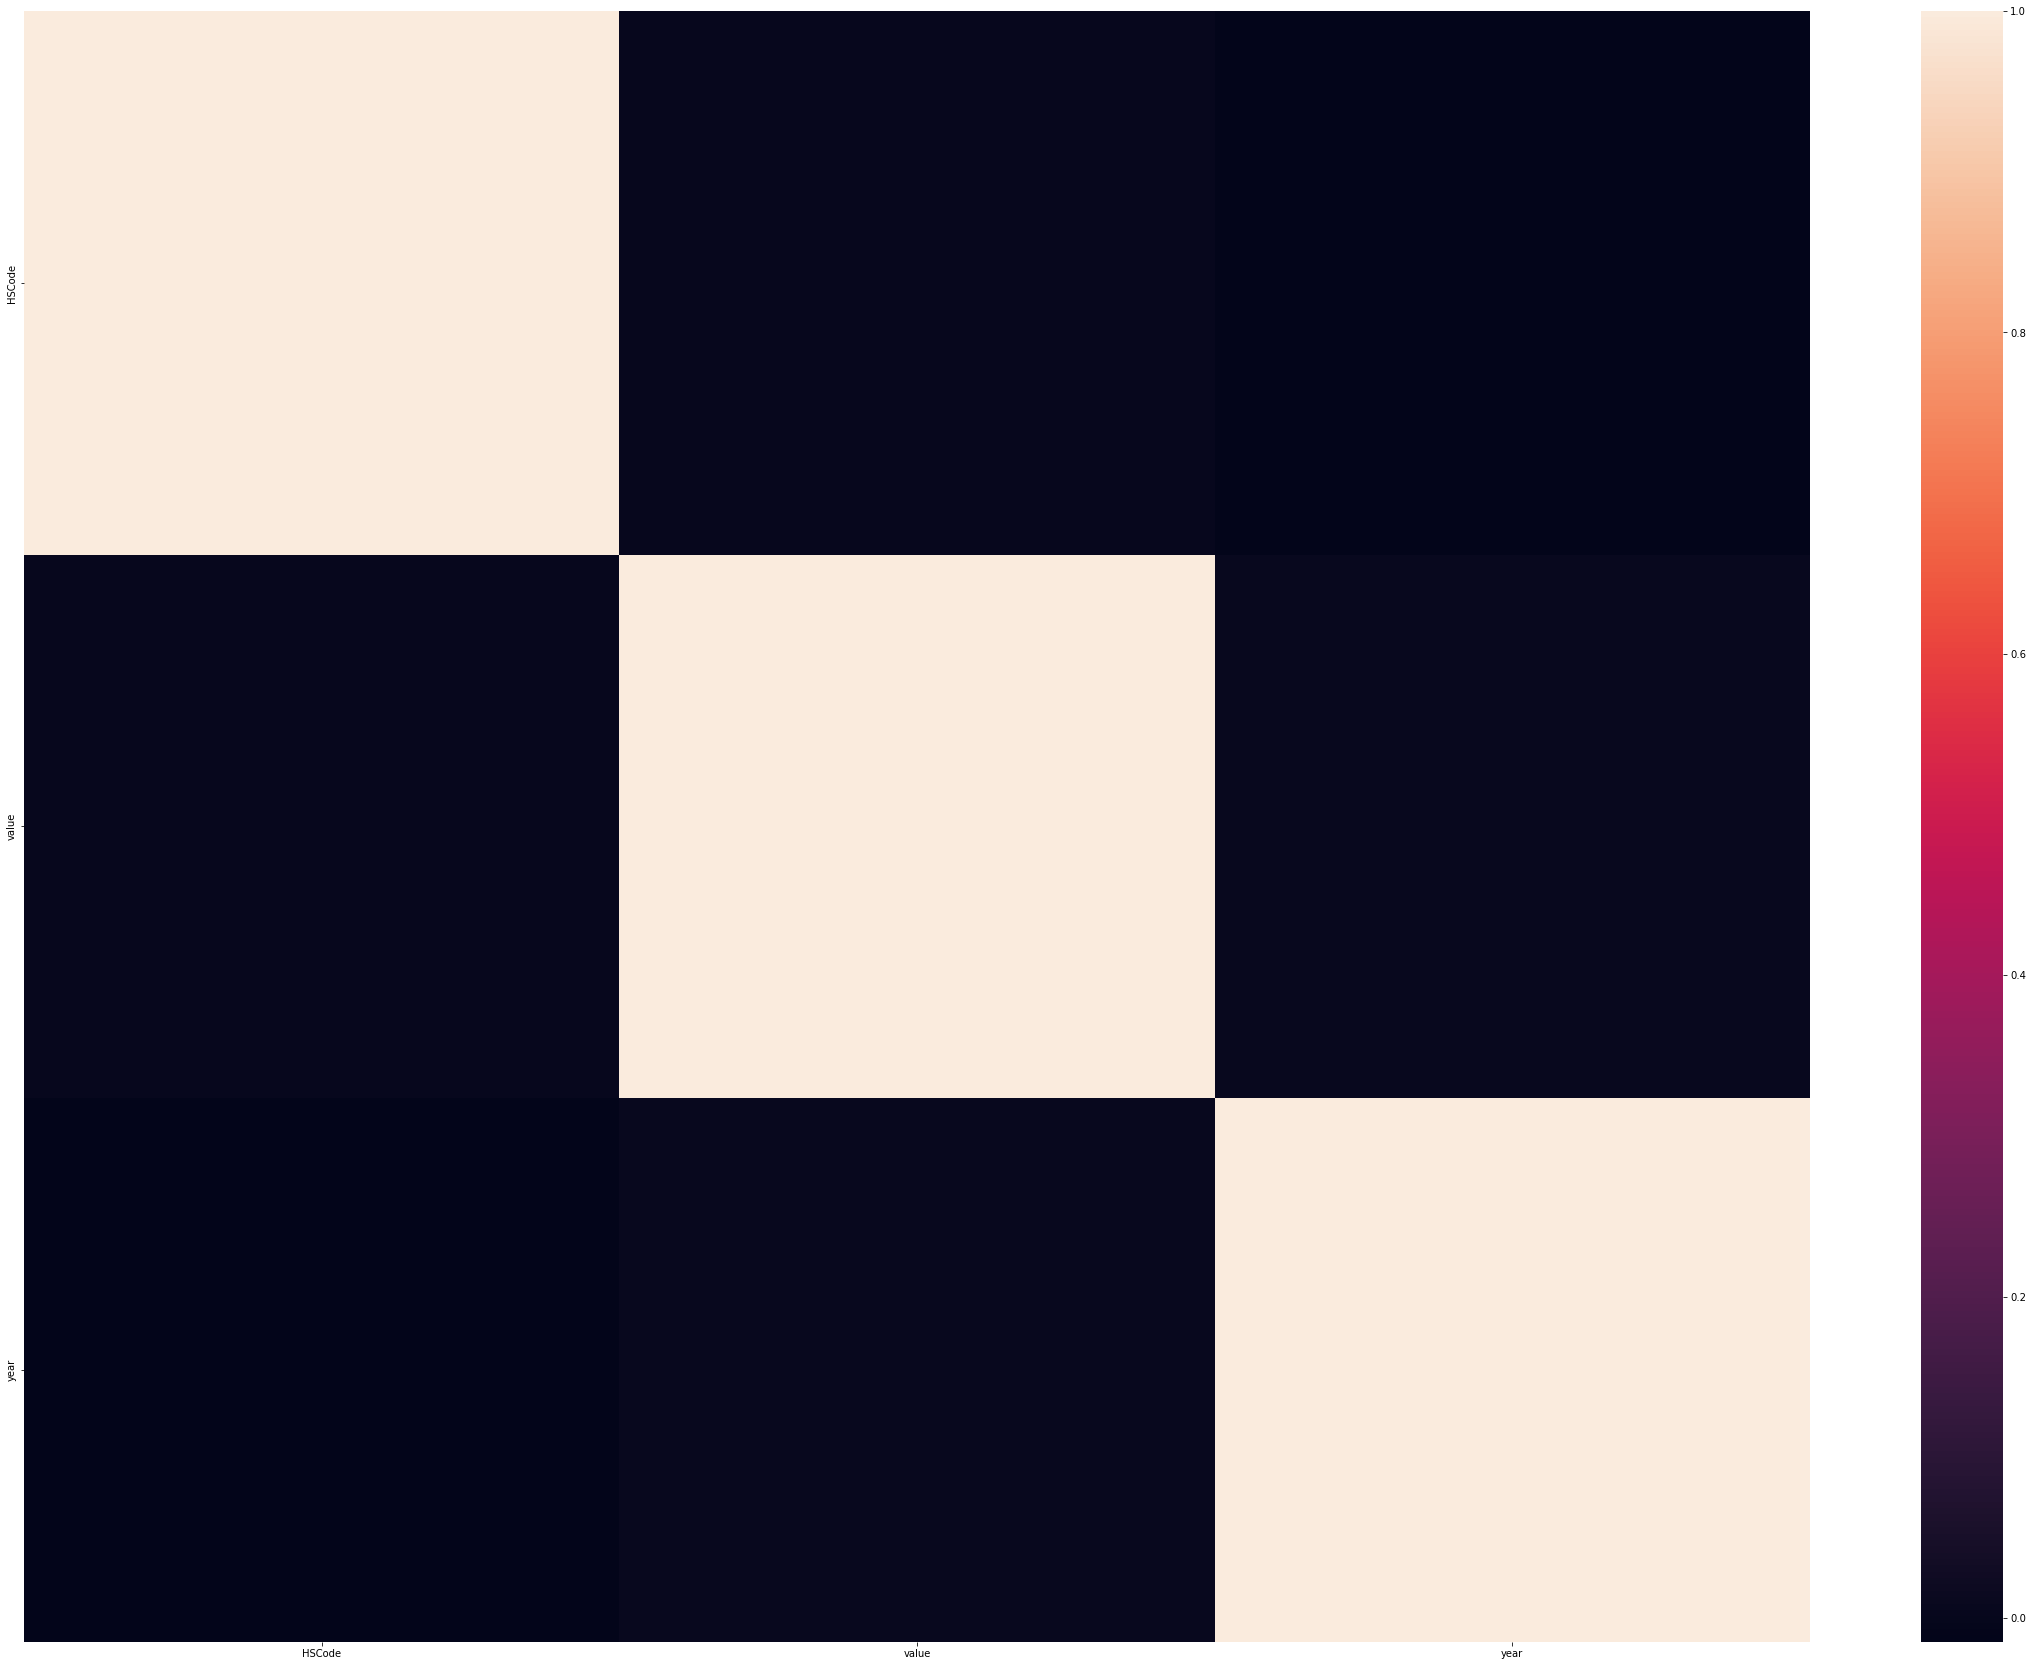

In [52]:
corr_matrix = data_e.corr()
sns.heatmap(corr_matrix)

In [47]:
#map visualization of both imports and exports of India

export_map = pd.DataFrame(data_e.groupby(['country'])['value'].sum().reset_index())
count = pd.DataFrame(export_map.groupby('country')['value'].sum().reset_index())

trace = [go.Choropleth(
            colorscale = 'algae',
            locationmode = 'country names',
            locations = count['country'],
            text = count['country'],
            z = count['value'],
            reversescale=True)]

layout = go.Layout(title = 'India Export to Other Country')

fig = go.Figure(data = trace, layout = layout)
py.iplot(fig)


In [48]:
import_map = pd.DataFrame(data_i.groupby(['country'])['value'].sum().reset_index())
count = pd.DataFrame(import_map.groupby('country')['value'].sum().reset_index())

trace = [go.Choropleth(
            colorscale = 'amp',
            locationmode = 'country names',
            locations = count['country'],
            text = count['country'],
            z = count['value'],
            reversescale=True)]

layout = go.Layout(title = 'India Import from Other Country')

fig = go.Figure(data = trace, layout = layout)
py.iplot(fig)

Final Findings :

1. India has been exporting to a total of 249 countries and importing to a total of 242 countries over the past decade (2010-2021)
2. China and UAE are the top 2 countries from which imports are maximum processed and, USA and UAE are the top 2 countries where exports are maximum processed.
3. Electrical machineries and Nuclear reactors and the top two commodities for both exports and imports.
4. Exports and imports of mostly all the commodities took a major dip in the year 2020 due to Covid 19 except some commodities like nuclear reactors and gems, pears industry.
5. India shows maximum trade deficit with China.

----------------------------------------------------End of the Project-----------------------------------------------------